In [24]:
import matplotlib.pyplot as plt
import pandas as pd

ds=pd.read_csv("/content/drive/MyDrive/nmims/sem1/aiml/kshamta mam/18-10-24/decisionTree_Data.csv")
ds.head()

,Age,Salary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [25]:
X=ds.iloc[:,[0,1]].values

In [26]:
y=ds.iloc[:,2].values

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [28]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
#

In [29]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [30]:
y_pred=classifier.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.91

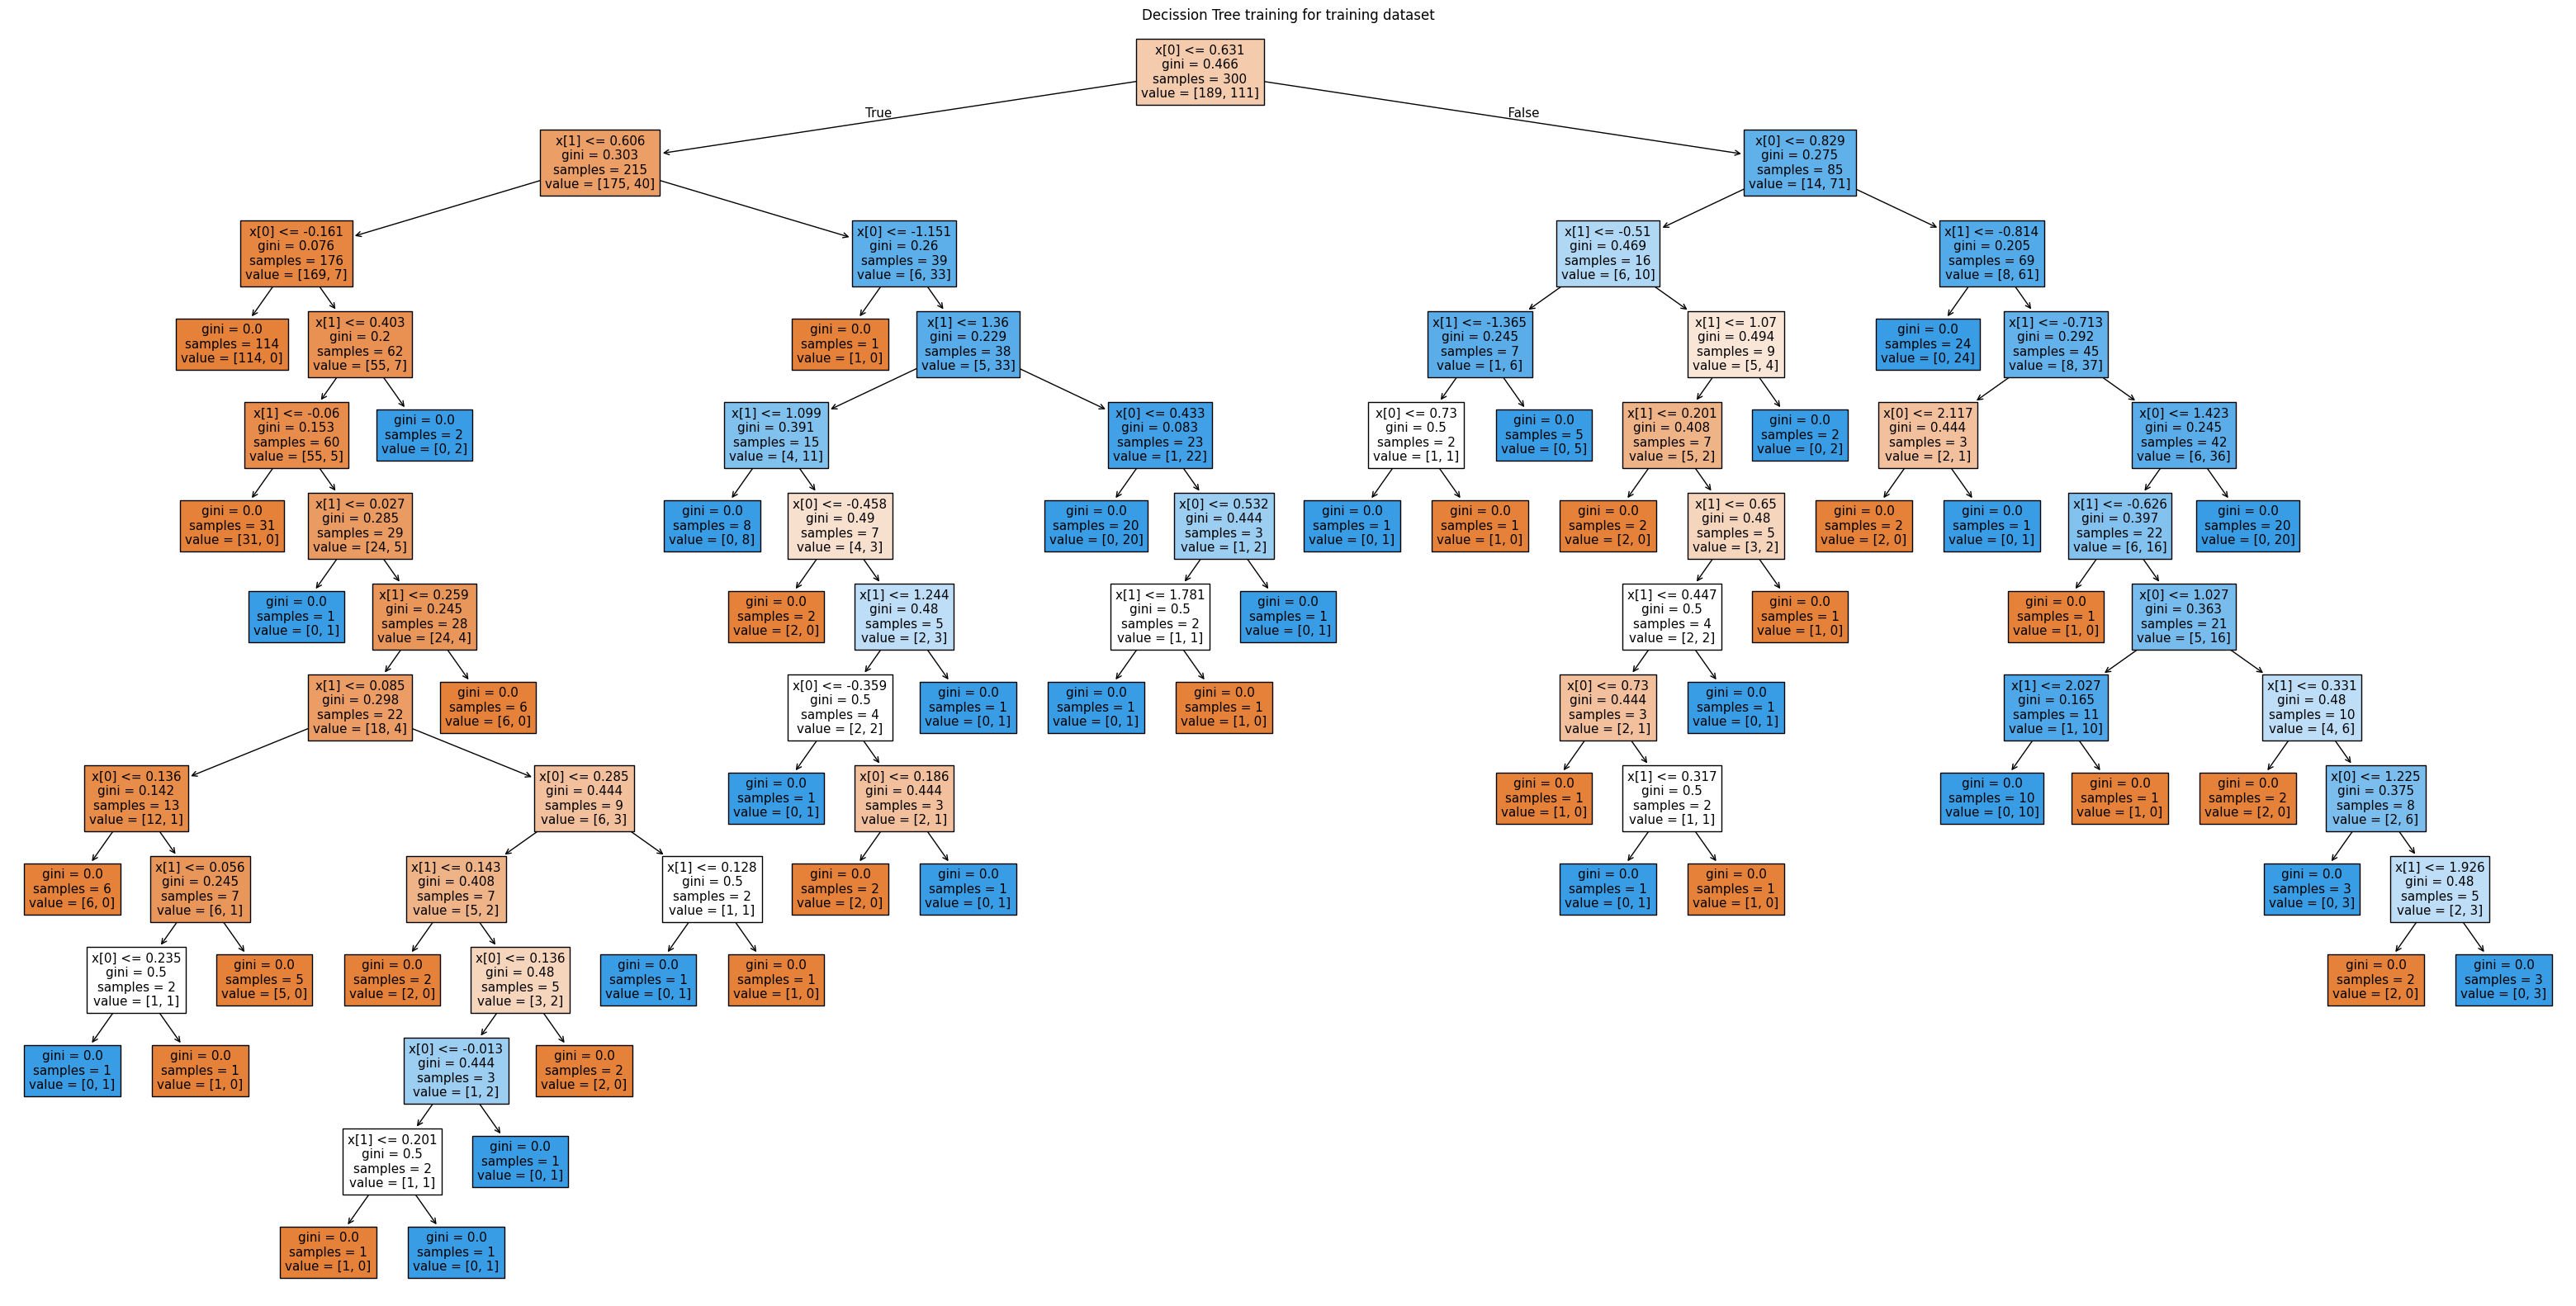

In [32]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf=DecisionTreeClassifier()
plt.figure(figsize=(40,20))
clf=clf.fit(X_train,y_train)
plot_tree(clf,filled=True)
plt.title("Decission Tree training for training dataset")
plt.show()

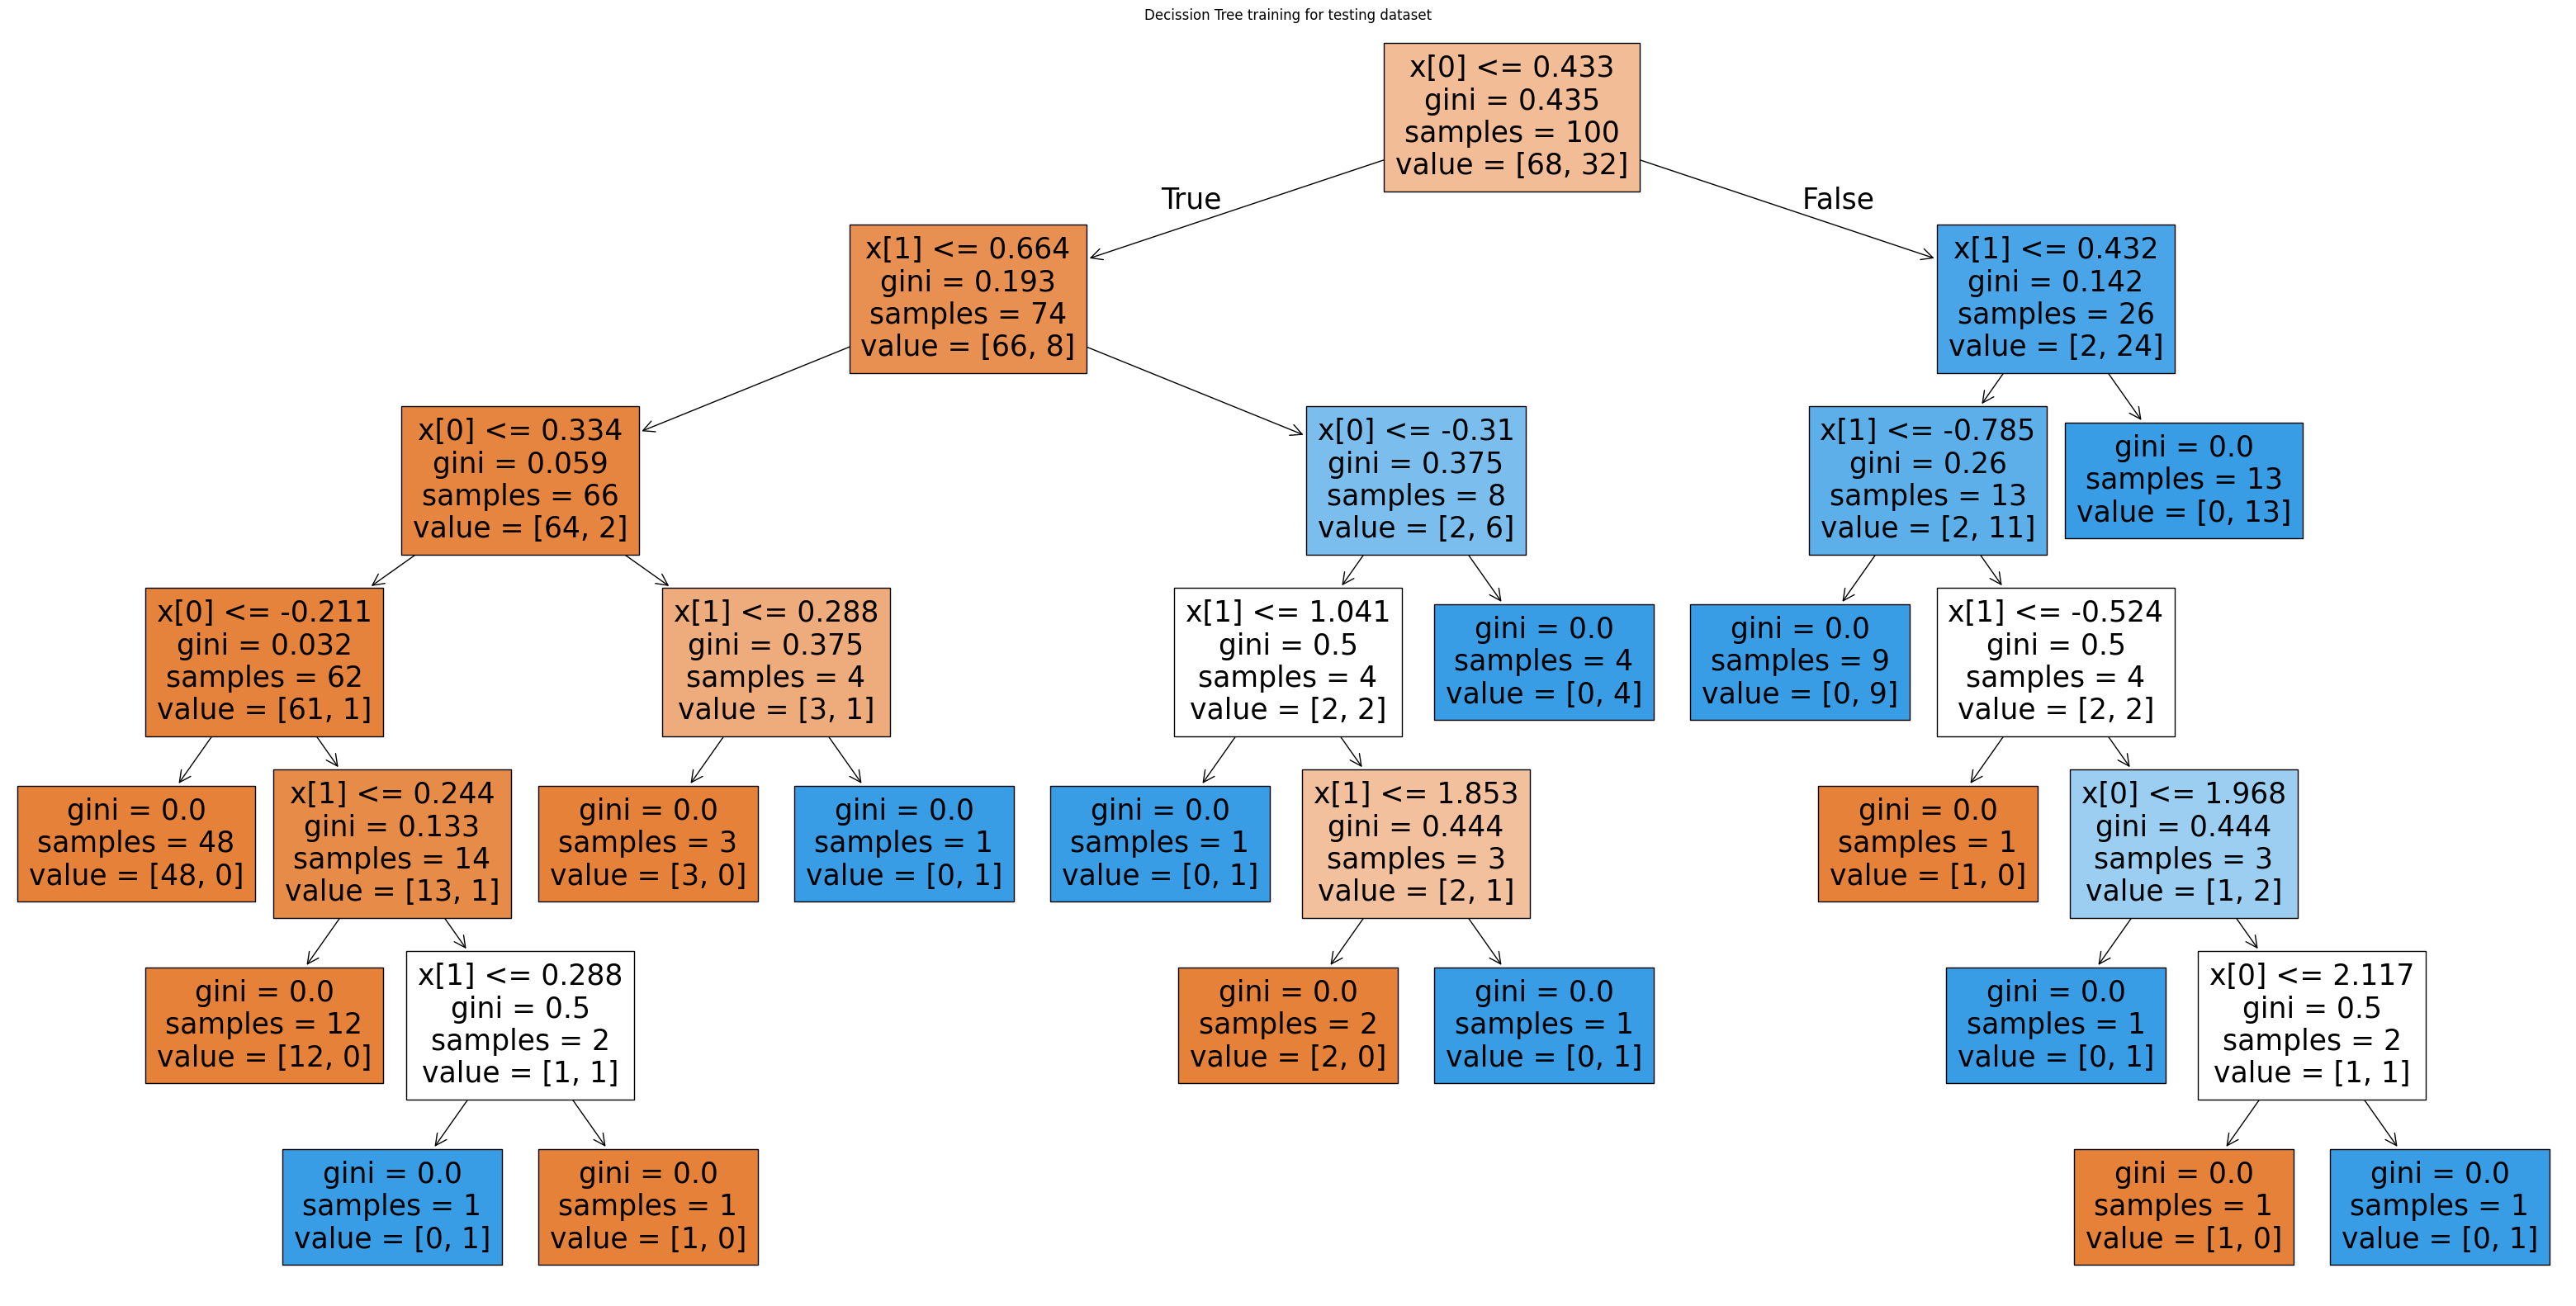

In [33]:
plt.figure(figsize=(40,20))
clf=clf.fit(X_test,y_test)
plot_tree(clf,filled=True)
plt.title("Decission Tree training for testing dataset")
plt.show()

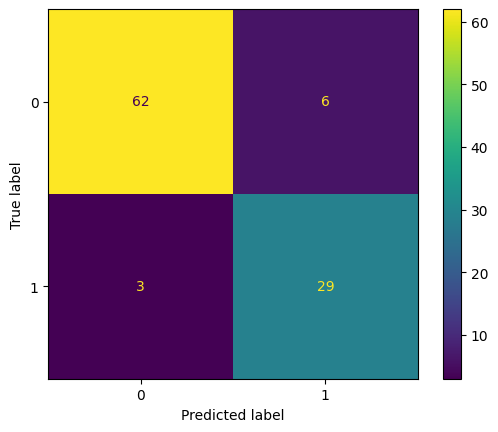

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred,labels=classifier.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.show()

In [35]:
def cf(y_actual, y_pred):
    TP = 0  # True Positive
    FP = 0  # False Positive
    TN = 0  # True Negative
    FN = 0  # False Negative

    for i in range(len(y_pred)):
        if y_actual[i] == y_pred[i] == 1:
            TP += 1
        elif y_pred[i] == 1 and y_actual[i] != y_pred[i]:
            FP += 1
        elif y_actual[i] == y_pred[i] == 0:
            TN += 1
        elif y_pred[i] == 0 and y_actual[i] != y_pred[i]:
            FN += 1

    print("True Positive: ", TP)
    print("False Positive: ", FP)
    print("True Negative: ", TN)
    print("False Negative: ", FN)

# Call the function with your test data
cf(y_test, y_pred)


True Positive:  29
False Positive:  6
True Negative:  62
False Negative:  3


In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

Accuracy:  0.91
Precision:  0.8285714285714286
Recall:  0.90625
F1 Score:  0.8656716417910447
